### Training Progress

Some plots to show the status of animal training on an animal by animal basis. Specifically focusing on the last month when training has stabilized and stage 8 encompasses many things. 

In [1]:
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd

import seaborn as sns
import pandas as pd


from performance_plots import * 
from io_utils import *

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")

In [2]:
df_all = fetch_latest_training_data()
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
training_stabilizing = pd.Timestamp(2022,11,1)
t_window_start = pd.Timestamp("2022-11-01")
df_antib =  df_all[(df_all['date'] > antibias_working)]
df_stable = df_all[(df_all['date'] > training_stabilizing)]


[2023-03-21 17:40:31,986][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-03-21 17:40:32,157][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


dropping 0 sessions of 213
fetched 213 sessions for R500 with latest date 2023-03-21
dropping 0 sessions of 216
fetched 216 sessions for R501 with latest date 2023-03-21
dropping 2 sessions of 221
fetched 219 sessions for R502 with latest date 2023-03-21
dropping 1 sessions of 217
fetched 216 sessions for R503 with latest date 2023-03-21
dropping 1 sessions of 220
fetched 219 sessions for R600 with latest date 2023-03-21


### R500


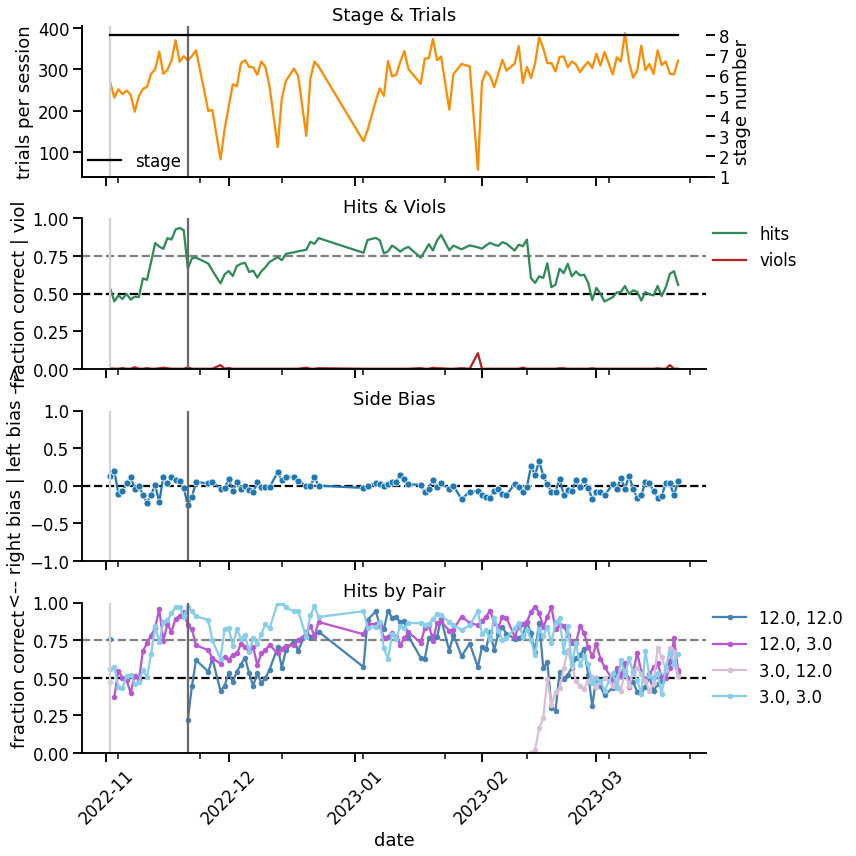

In [3]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R500'
df = df_stable.query("animal_id == 'R500'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[3], 'Hits by Pair')
plot_bias_history(df, axs[2], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    # axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    # axs[iax].axvline(pd.Timestamp('2022-09-11'), color='darkgray')
    # axs[iax].axvline(pd.Timestamp('2022-09-21'), color='dimgray')
    # axs[iax].axvline(pd.Timestamp('2022-10-20'),color='black')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-11-21'), color='dimgray')

    if iax == 1 or iax == 3:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)
plt.tight_layout()

3.0, 3.0       59
12.0, 12.0     82
12.0, 3.0     100
3.0, 12.0      80
Name: sound_pair, dtype: int64


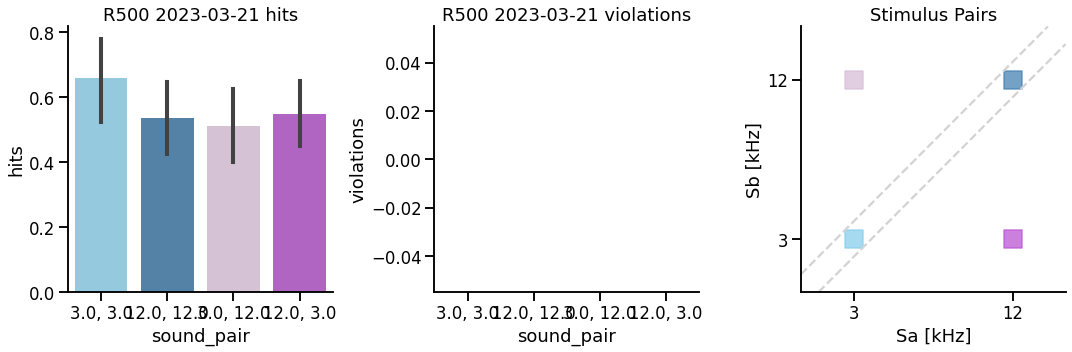

In [4]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()

### R501


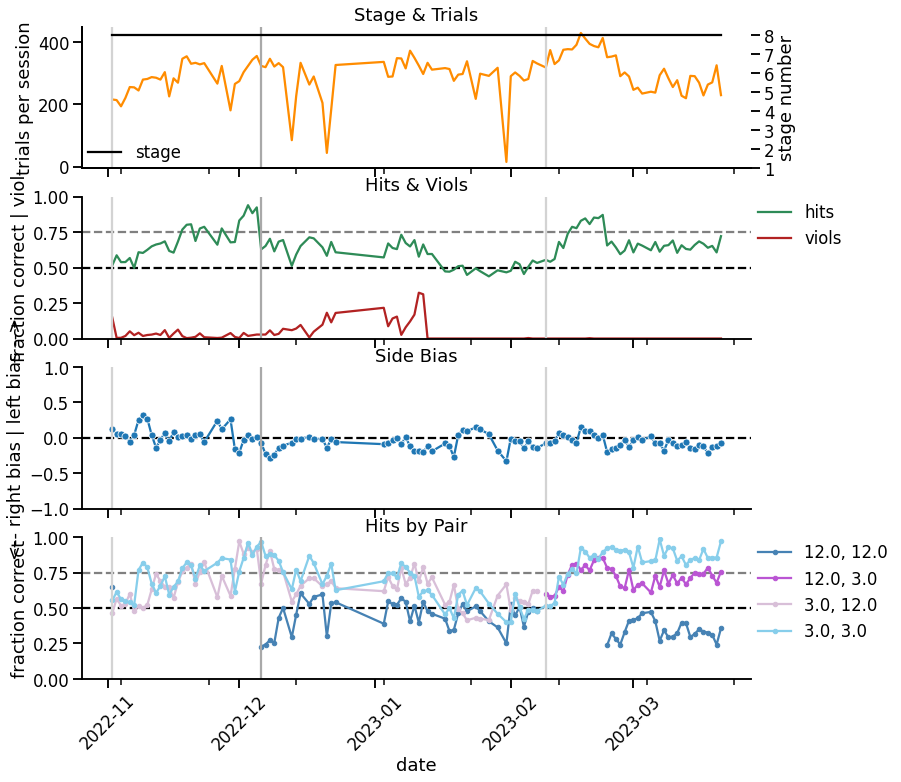

In [5]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R501'
df = df_stable.query("animal_id == 'R501'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[3], 'Hits by Pair')
plot_bias_history(df, axs[2], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    # axs[iax].axvline(pd.Timestamp('2022-08-26'),color='lightgray')
    # axs[iax].axvline(pd.Timestamp('2022-10-01'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-12-06'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2023-02-09'),color='lightgray')


    if iax == 1 or iax == 3:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)


3.0, 3.0       67
12.0, 12.0     56
12.0, 3.0     107
Name: sound_pair, dtype: int64


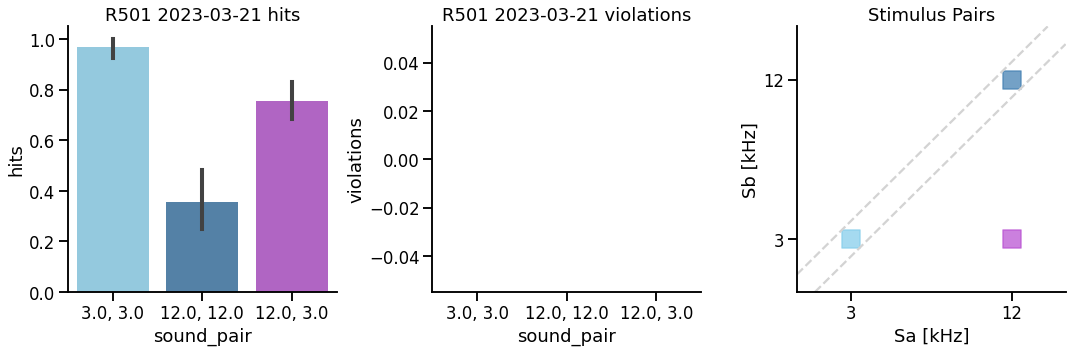

In [6]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()

### R502

This animal is super motivated but is doing really, really short fixations (~ 0.5s) because he has one pace of center left center right. Just seems to be catching onto rule and might be ready to switch though

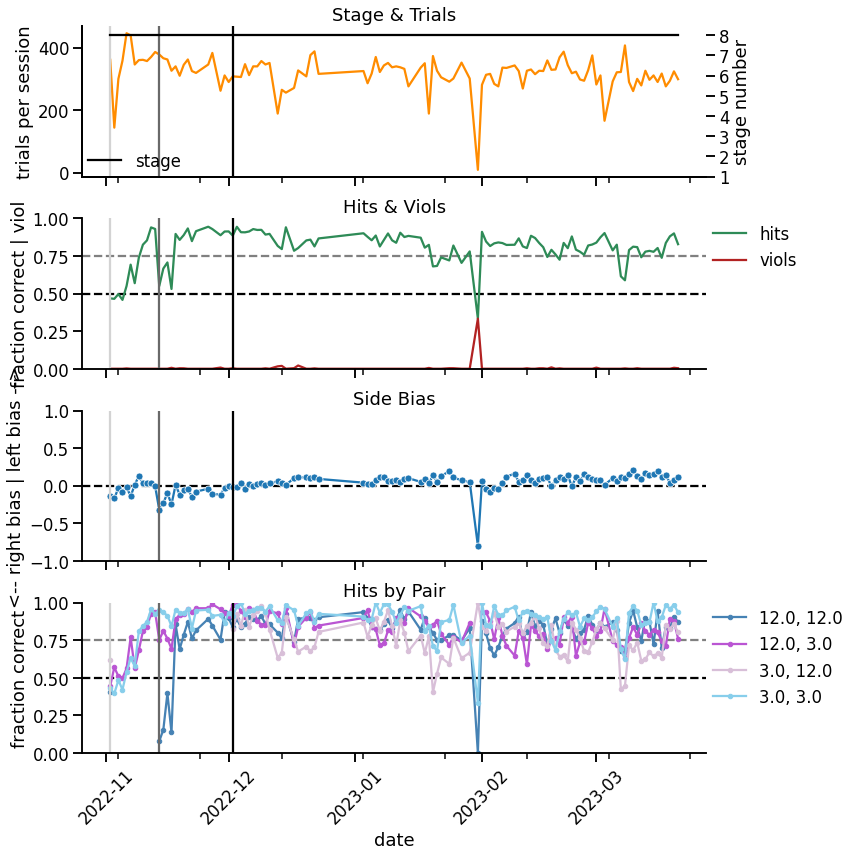

In [7]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R502'
df = df_stable.query("animal_id == 'R502'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[3], 'Hits by Pair')
plot_bias_history(df, axs[2], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    # axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    # axs[iax].axvline(pd.Timestamp('2022-09-22'),color='darkgray')
    # axs[iax].axvline(pd.Timestamp('2022-09-25'),color='dimgray')
    # axs[iax].axvline(pd.Timestamp('2022-10-05'),color='black')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-11-14'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-12-02'),color='black')

    if iax == 1 or iax == 3:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)
plt.tight_layout()

3.0, 3.0      62
12.0, 12.0    55
12.0, 3.0     96
3.0, 12.0     86
Name: sound_pair, dtype: int64


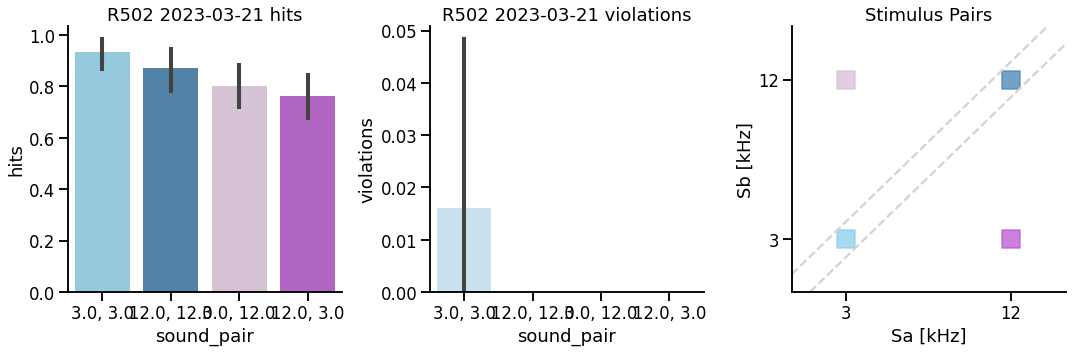

In [8]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()

### R503


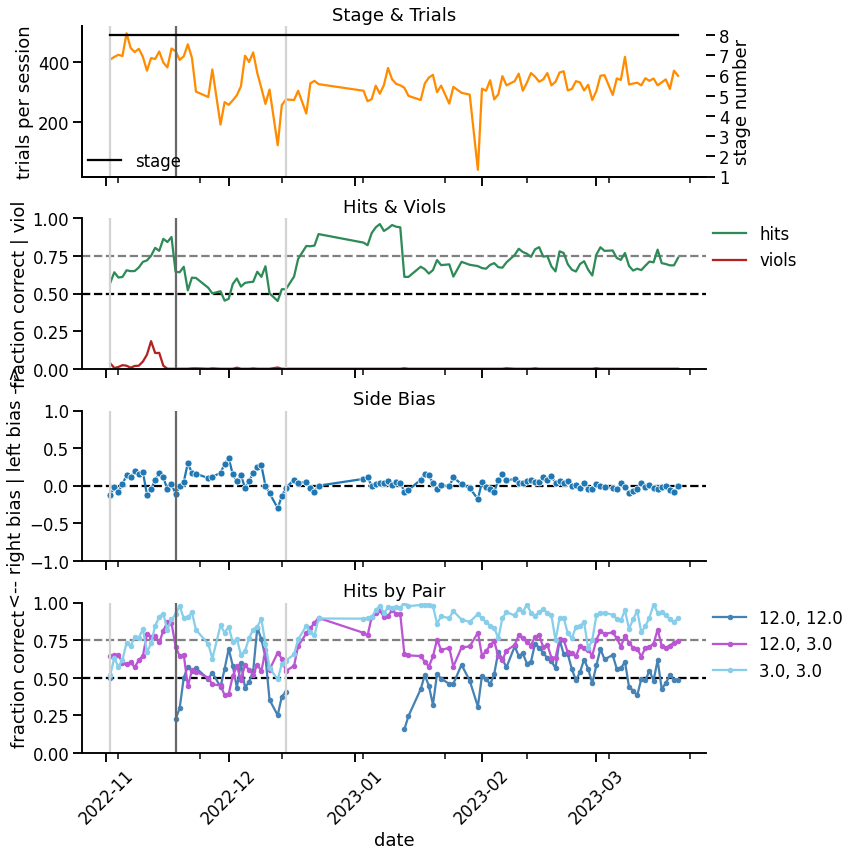

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R503'
df = df_stable.query("animal_id == 'R503'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[3], 'Hits by Pair')
plot_bias_history(df, axs[2], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    # axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    # axs[iax].axvline(pd.Timestamp('2022-09-08'),color='darkgray')
    # axs[iax].axvline(pd.Timestamp('2022-09-30'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-11-18'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-12-15'),color='lightgray')

    if iax == 1 or iax == 3:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)

plt.tight_layout()

3.0, 3.0      114
12.0, 12.0     76
12.0, 3.0     165
Name: sound_pair, dtype: int64


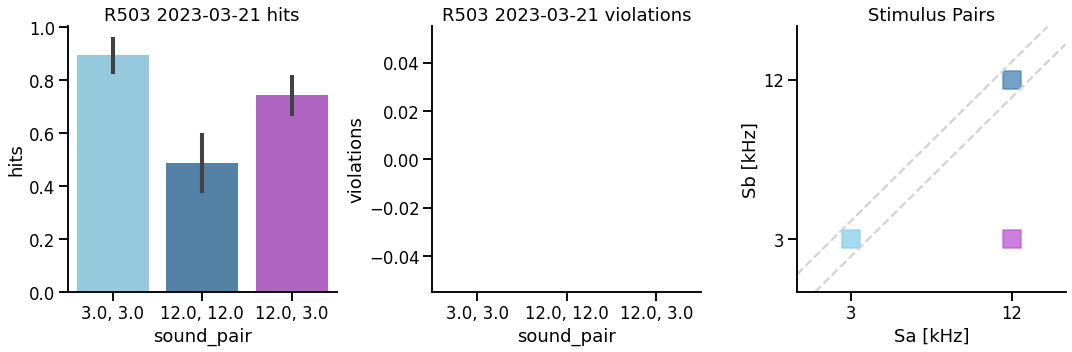

In [10]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()

### R600

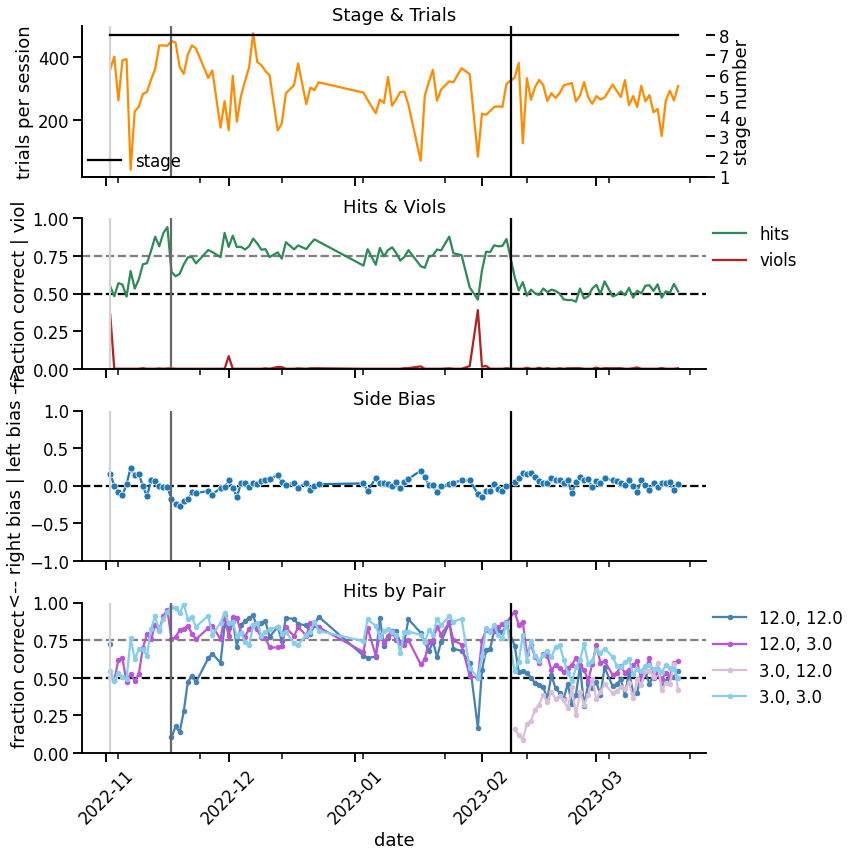

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R600'
df = df_stable.query("animal_id == 'R600'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[3], 'Hits by Pair')
plot_bias_history(df, axs[2], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    # axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    # axs[iax].axvline(pd.Timestamp('2022-09-15'),color='darkgray')
    # axs[iax].axvline(pd.Timestamp('2022-09-23'),color='dimgray')
    # axs[iax].axvline(pd.Timestamp('2022-10-06'),color='black')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-11-17'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2023-02-08'),color='black')
    if iax == 1 or iax == 3:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)
plt.tight_layout()

3.0, 3.0      71
12.0, 12.0    77
12.0, 3.0     72
3.0, 12.0     88
Name: sound_pair, dtype: int64


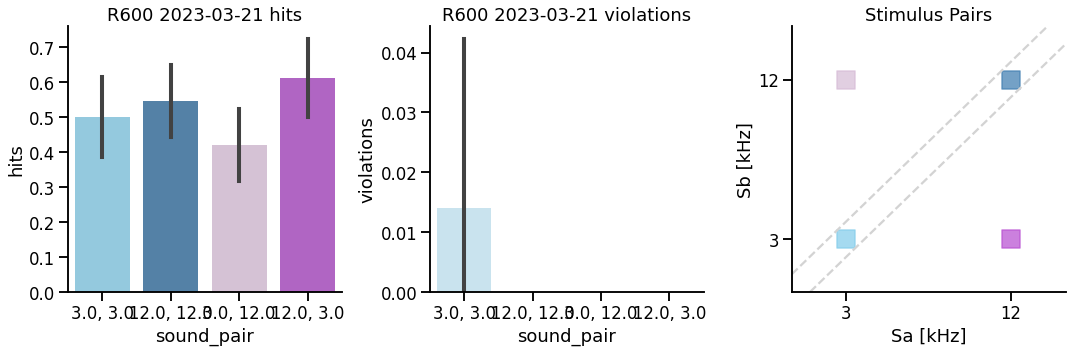

In [12]:
fig,ax = plt.subplots(1,3, figsize=(15,5))   
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()